# Gender Bias in Recruitment AI

The AI at hand is to make recruitment decisions based on the candidates' interview performance. Let's try to make it less biased toward a certain gender.

The code brings in historical recruitment data (`train.csv`) and new candidate data (`test.csv`). It learns from historical recruitment data, and performs a decision/prediction on the new candidates if they will get the job or not.

## Training With Dataset1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()

creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

# for dirname, _, filenames in os.walk('/content/drive/My Drive/data/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# worksheet = gc.open('train1').sheet1
# rows = worksheet.get_all_values()
# df = pd.DataFrame(rows)
# df.columns = df.iloc[0]
# train_data = df.iloc[1:]

train_data = pd.read_csv("/content/drive/My Drive/Recruitment/dataset1.csv")
test_data = pd.read_csv("/content/drive/My Drive/Recruitment/test1.csv")

In [66]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["employed_yes"]

features = ["sex_male","years_experience", "referred", "interview_score"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

predictions = model.predict(X_test)
test_data.columns.values[0] = "candidateID"
test_data.columns = test_data.columns.str.strip()
output = pd.DataFrame({'CandidateID': test_data["candidateID"], 'Gender':test_data.sex_male, "Experience": test_data.years_experience, "Referal" : test_data.referred, 'Interview_score':test_data.interview_score, 'Hired': predictions})
output.to_csv('/content/drive/My Drive/Recruitment/output1.csv', index=False)
output

,CandidateID,Gender,Experience,Referal,Interview_score,Hired
0,0,1,0,1,76,1
1,1,0,3,0,64,1
2,2,1,0,0,82,1
3,3,0,1,0,78,1
4,4,0,4,0,83,1
...,...,...,...,...,...,...
95,95,0,0,0,61,0
96,96,0,0,0,59,0
97,97,0,0,0,97,1
98,98,1,0,0,69,1


In [29]:
avaerge_male_score = output[output["Gender"] == 1]["Interview_score"].mean()
avaerge_female_score = output[output["Gender"] == 0]["Interview_score"].mean()
print("Average interview score for males: " + str(avaerge_male_score))
print("Average interview score for females: " + str(avaerge_female_score))

Average interview score for males: 69.66666666666667
Average interview score for females: 72.8076923076923


Total Hired People:87
Total Hired Males:39


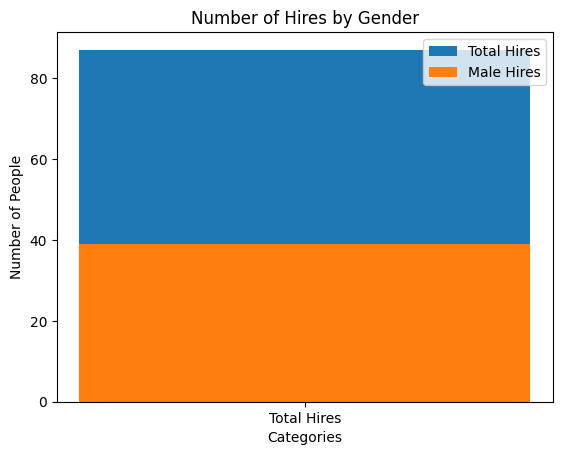

In [30]:
hired_df = output[output["Hired"] == 1]
print("Total Hired People:" + str(hired_df.shape[0]))
hired_male_df = hired_df[hired_df["Gender"] == 1]
print("Total Hired Males:" + str(hired_male_df.shape[0]))
categories = ['Total Hires']
total_hires = [hired_df.shape[0]]
male_hires = [hired_male_df.shape[0]]
plt.bar(categories, total_hires, label='Total Hires')
plt.bar(categories, male_hires, label='Male Hires')
plt.xlabel('Categories')
plt.ylabel('Number of People')
plt.title('Number of Hires by Gender')
plt.legend()
plt.show()

## Training With Dataset2

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

# for dirname, _, filenames in os.walk('/content/drive/My Drive/data/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# worksheet = gc.open('train2').sheet1
# rows = worksheet.get_all_values()
# df = pd.DataFrame(rows)
# df.columns = df.iloc[0]
# train_data = df.iloc[1:]

train_data = pd.read_csv("/content/drive/My Drive/Recruitment/dataset2 - debiased.csv")
test_data = pd.read_csv("/content/drive/My Drive/Recruitment/test1.csv")

In [65]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["employed_yes"]

features = ["sex_male","years_experience", "referred", "interview_score"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
print(["sex_male","years_experience", "referred", "interview_score"])
print(model.feature_importances_)

predictions = model.predict(X_test)
test_data.columns.values[0] = "candidateID"
test_data.columns = test_data.columns.str.strip()
output = pd.DataFrame({'CandidateID': test_data["candidateID"], 'Gender':test_data.sex_male, "Experience": test_data.years_experience, "Referal" : test_data.referred, 'Interview_score':test_data.interview_score, 'Hired': predictions})
output.to_csv('/content/drive/My Drive/Recruitment/output1.csv', index=False)
output

['sex_male', 'years_experience', 'referred', 'interview_score']
[0.2067354  0.07391827 0.08167605 0.63767028]


,CandidateID,Gender,Experience,Referal,Interview_score,Hired
0,0,1,0,1,76,1
1,1,0,3,0,64,1
2,2,1,0,0,82,1
3,3,0,1,0,78,1
4,4,0,4,0,83,1
...,...,...,...,...,...,...
95,95,0,0,0,61,0
96,96,0,0,0,59,0
97,97,0,0,0,97,1
98,98,1,0,0,69,1


In [63]:
avaerge_male_score = output[output["Gender"] == 1]["Interview_score"].mean()
avaerge_female_score = output[output["Gender"] == 0]["Interview_score"].mean()
print("Average interview score for males: " + str(avaerge_male_score))
print("Average interview score for females: " + str(avaerge_female_score))

Average interview score for males: 69.66666666666667
Average interview score for females: 72.8076923076923


Total Hired People:88
Total Hired Males:48


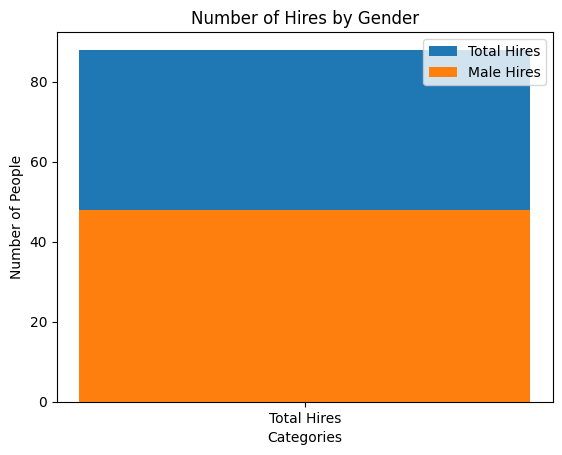

In [64]:
hired_df = output[output["Hired"] == 1]
print("Total Hired People:" + str(hired_df.shape[0]))
hired_male_df = hired_df[hired_df["Gender"] == 1]
print("Total Hired Males:" + str(hired_male_df.shape[0]))
categories = ['Total Hires']
total_hires = [hired_df.shape[0]]
male_hires = [hired_male_df.shape[0]]
plt.bar(categories, total_hires, label='Total Hires')
plt.bar(categories, male_hires, label='Male Hires')
plt.xlabel('Categories')
plt.ylabel('Number of People')
plt.title('Number of Hires by Gender')
plt.legend()
plt.show()

## Training With Dataset3

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os

# for dirname, _, filenames in os.walk('/content/drive/My Drive/data/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# worksheet = gc.open('train3').sheet1
# rows = worksheet.get_all_values()
# df = pd.DataFrame(rows)
# df.columns = df.iloc[0]
# train_data = df.iloc[1:]

train_data = pd.read_csv("/content/drive/My Drive/Recruitment/dataset3.csv")
test_data = pd.read_csv("/content/drive/My Drive/Recruitment/test1.csv")

Training Data where the hiring outcome is only determined by years of experience, referal, and interview scores.

In [67]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["employed_yes"]

features = ["years_experience", "referred", "interview_score"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

predictions = model.predict(X_test)
test_data.columns.values[0] = "candidateID"
test_data.columns = test_data.columns.str.strip()
output = pd.DataFrame({'CandidateID': test_data["candidateID"], 'Gender':test_data.sex_male,"Experience": test_data.years_experience, "Referal" : test_data.referred, 'Interview_score':test_data.interview_score, 'Hired': predictions})
output.to_csv('/content/drive/My Drive/Recruitment/output1.csv', index=False)
output

,CandidateID,Gender,Experience,Referal,Interview_score,Hired
0,0,1,0,1,76,1
1,1,0,3,0,64,1
2,2,1,0,0,82,1
3,3,0,1,0,78,1
4,4,0,4,0,83,1
...,...,...,...,...,...,...
95,95,0,0,0,61,0
96,96,0,0,0,59,0
97,97,0,0,0,97,1
98,98,1,0,0,69,1


In [37]:
avaerge_male_score = output[output["Gender"] == 1]["Interview_score"].mean()
avaerge_female_score = output[output["Gender"] == 0]["Interview_score"].mean()
print("Average interview score for males: " + str(avaerge_male_score))
print("Average interview score for females: " + str(avaerge_female_score))

Average interview score for males: 69.66666666666667
Average interview score for females: 72.8076923076923


Total Hired People:83
Total Hired Males:40


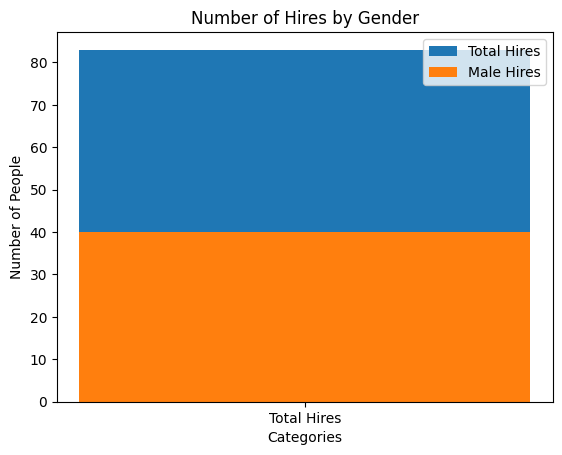

In [38]:
hired_df = output[output["Hired"] == 1]
print("Total Hired People:" + str(hired_df.shape[0]))
hired_male_df = hired_df[hired_df["Gender"] == 1]
print("Total Hired Males:" + str(hired_male_df.shape[0]))
categories = ['Total Hires']
total_hires = [hired_df.shape[0]]
male_hires = [hired_male_df.shape[0]]
plt.bar(categories, total_hires, label='Total Hires')
plt.bar(categories, male_hires, label='Male Hires')
plt.xlabel('Categories')
plt.ylabel('Number of People')
plt.title('Number of Hires by Gender')
plt.legend()
plt.show()